In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1

### a

In [2]:
import scipy.stats as sts
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)
rho = 0.85
mu = 11.4
z_t = np.zeros(T+1)
z_t[0] = mu
for i in range(1, T+1):
    z_t[i] = rho * z_t[i-1] + (1 - rho) * mu + eps_vec[i-1]

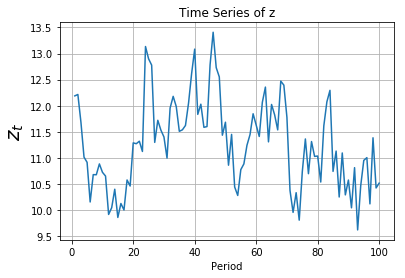

In [3]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,101), z_t[1:101])
ax.set_xlabel('Period')
ax.set_ylabel('$z_t$', size = 20)
ax.set_title('Time Series of z')
ax.grid()

### b

In [4]:
z_vals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 5)
print(z_vals)

[ 9.3  10.35 11.4  12.45 13.5 ]


### c

In [5]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

In [6]:
Phat = np.zeros((5,5),dtype='float')
def transform(series, cuts = z_cuts):
    discrete = np.zeros_like(series)
    for i in range(len(series)):
        if series[i] <= cuts[0]:
            discrete[i] = 1
        elif series[i] <= cuts[1]:
            discrete[i] = 2
        elif series[i] <= cuts[2]:
            discrete[i] = 3
        elif series[i] <= cuts[3]:
            discrete[i] = 4
        else:
            discrete[i] = 5
    return discrete
z_t_bins = transform(z_t)
for i in range(5):
    for j in range(5):
        for k in range(len(z_t_bins)-1):
            if z_t_bins[k] == i+1 and z_t_bins[k+1] == j+1:
                Phat[i,j] += 1
for i in range(5):
    Sum = Phat[i,:].sum()
    Phat[i,:] = Phat[i,:]/Sum
print('Phat is\n', Phat)

Phat is
 [[0.69387755 0.26530612 0.04081633 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.0304878  0.2195122  0.48170732 0.23170732 0.03658537]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


### d

In [7]:
Phat_3 = Phat @ Phat @ Phat
print('The probability of z_{t+3} being in bin 5 given that z_t is in bin 3 today is', Phat_3[2,4])

The probability of z_{t+3} being in bin 5 given that z_t is in bin 3 today is 0.08058689966619678


### e

In [8]:
value, vectors = np.linalg.eig(Phat)

In [9]:
print('eigenvalue =', value)

eigenvalue = [1.         0.76714474 0.57565246 0.37097073 0.12018528]


Since eigenvalue are all nonzero, we can diagonalize $\hat{P}$ to $H\Sigma H^{-1}$ and $\hat{P}^{n} = H\Sigma^{n} H^{-1}$. And $\lim_{n \rightarrow \infty} \Sigma = 
\left[
\begin{matrix}
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{matrix}
\right]$ 

In [10]:
Phat_n = vectors @ np.diag(np.array([1,0,0,0,0])) @ np.linalg.inv(vectors)
print('The stationary distribution of z_t is', Phat_n[0,:])

The stationary distribution of z_t is [0.1045698  0.24154031 0.32373493 0.23529555 0.09485941]


### f

In [11]:
def transform2(P):
    P_new = np.zeros_like(P)
    P_new[:,0] = P[:,0]
    for i in range(1,P.shape[1]):
        P_new[:,i] = P_new[:,i-1] + P[:,i]
    return P_new
new_z_t = np.zeros(T+1)
new_z_t_idx = np.zeros(T+1, dtype = 'int')
new_z_t[0] = z_vals[2]
new_z_t_idx[0] = 2
P_t = np.eye(5)
for i in range(T):
    P_t = P_t @ Phat
    P_t_sum = transform2(P_t)
    cdf_t = P_t_sum[new_z_t_idx[i],:]
    new_z_t_idx[i+1] = transform(np.array([unif_vec[i]]), cuts = cdf_t)[0]-1
    new_z_t[i+1] = z_vals[new_z_t_idx[i+1]]

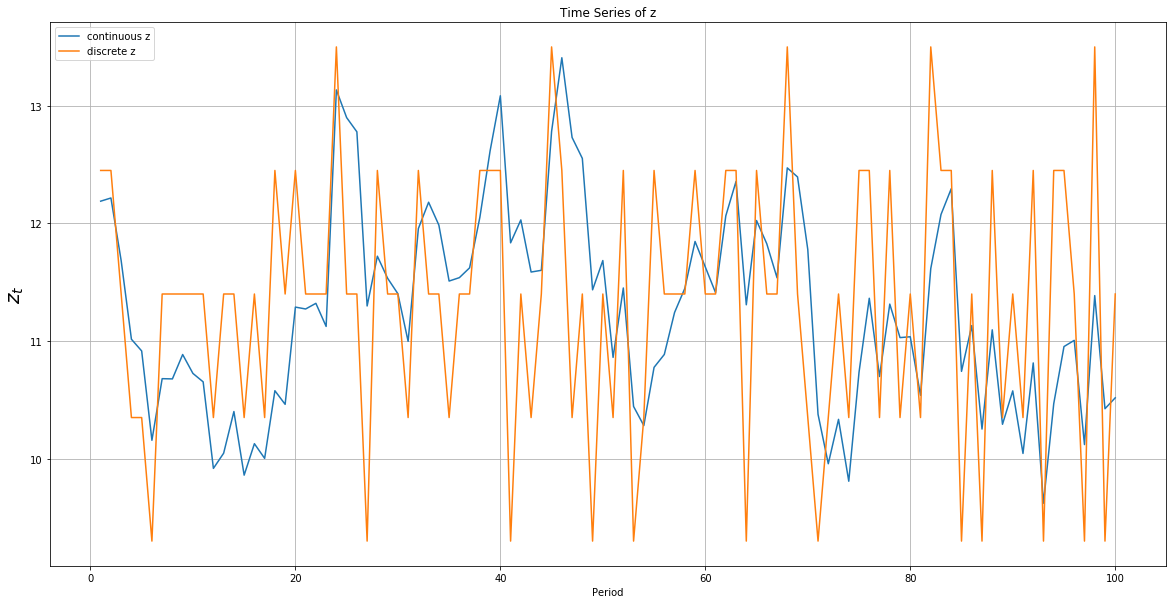

In [12]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(np.arange(1,101), z_t[1:101], label = 'continuous z')
ax.plot(np.arange(1,101), new_z_t[1:101], label = 'discrete z')
ax.set_xlabel('Period')
ax.set_ylabel('$z_t$', size = 20)
ax.set_title('Time Series of z')
ax.legend()
ax.grid()